<a href="https://colab.research.google.com/github/liscolme/EscapeEarth/blob/main/Interns/Elise/SampleReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount google drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
## typical imports
%matplotlib inline
import matplotlib.pyplot as plt
!pip install lightkurve==1.9.0
import lightkurve as lk
import numpy as np
import pandas as pd
from astroquery.mast import Catalogs

In [ ]:
#load df of visually found transits
candidates = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/exoplanet_candidates.csv')
candidates

,TIC,Sector,author,ExoFOPclass,notes
0,233120979,14,danielle,PC,wrong orbital period but definitely transits i...
1,28230919,14,olivia,Unknown,seems to line up
2,99813351,14,olivia,Unknown,"wrong orbital period, possibly a transit"
3,26656583,14,olivia,Unknown,NaN
4,99920728,14,olivia,Unknown,NaN
...,...,...,...,...,...
124,396779850,14,olivia,Unknown,No information regarding the dispositions and ...
125,406951407,14,olivia,Unknown,No information regarding the dispositions and ...
126,408474216,14,olivia,Unknown,No information regarding the dispositions and ...
127,416195870,14,olivia,PC,NaN


In [ ]:
falsep_index = []
unknown_index = []
planets_index = []
for idx, i in enumerate(candidates['ExoFOPclass'].to_numpy()):
  if i == 'PC':
    planets_index.append(idx)
  elif (i[0] == 'U') | (i[0] == 'u'): 
    unknown_index.append(idx)
  elif i == 'FP':
    falsep_index.append(idx)
  else:
    print('Something went wrong', idx, i)
all_lists = [falsep_index, unknown_index, planets_index]
for i in all_lists:
  print(len(i))

18
105
6


In [ ]:
#apply index masks to isolate types of transits
falsep = candidates.iloc[falsep_index]
unknown = candidates.iloc[unknown_index]
planets = candidates.iloc[planets_index]
print(len(falsep), len(unknown), len(planets))

18 105 6


In [ ]:
#open stats data
main_df = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/main_df.csv')
main_df

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,7582633,0.299916,0.298,0.157,0,0.000398,14
1,7582634,0.299916,0.298,0.161,0,0.000534,14
2,7583285,0.301269,0.298,0.162,1,0.000406,14
3,7584971,0.301269,0.298,0.157,1,0.000111,14
4,7585322,0.299916,0.298,0.154,0,0.000102,14
...,...,...,...,...,...,...,...
32030,2002418280,0.299916,0.298,0.155,0,0.000474,15
32031,2002418281,0.299916,0.298,0.159,0,0.000462,15
32032,2002486147,0.301269,0.298,0.161,1,0.000159,15
32033,2003139541,0.299916,0.298,0.158,0,0.000235,15


In [ ]:
falsep_list = main_df[np.isin(main_df['TIC'],falsep['TIC'])]
planet_list = main_df[np.isin(main_df['TIC'],planets['TIC'])]
unknown_list = main_df[np.isin(main_df['TIC'],unknown['TIC'])]
print(len(falsep_list), len(planet_list), len(unknown_list))

27 10 139


In [ ]:
planet_list2= pd.concat([planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,planet_list,
                         ])
falsep_list2 = pd.concat([falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,falsep_list,
                          ])

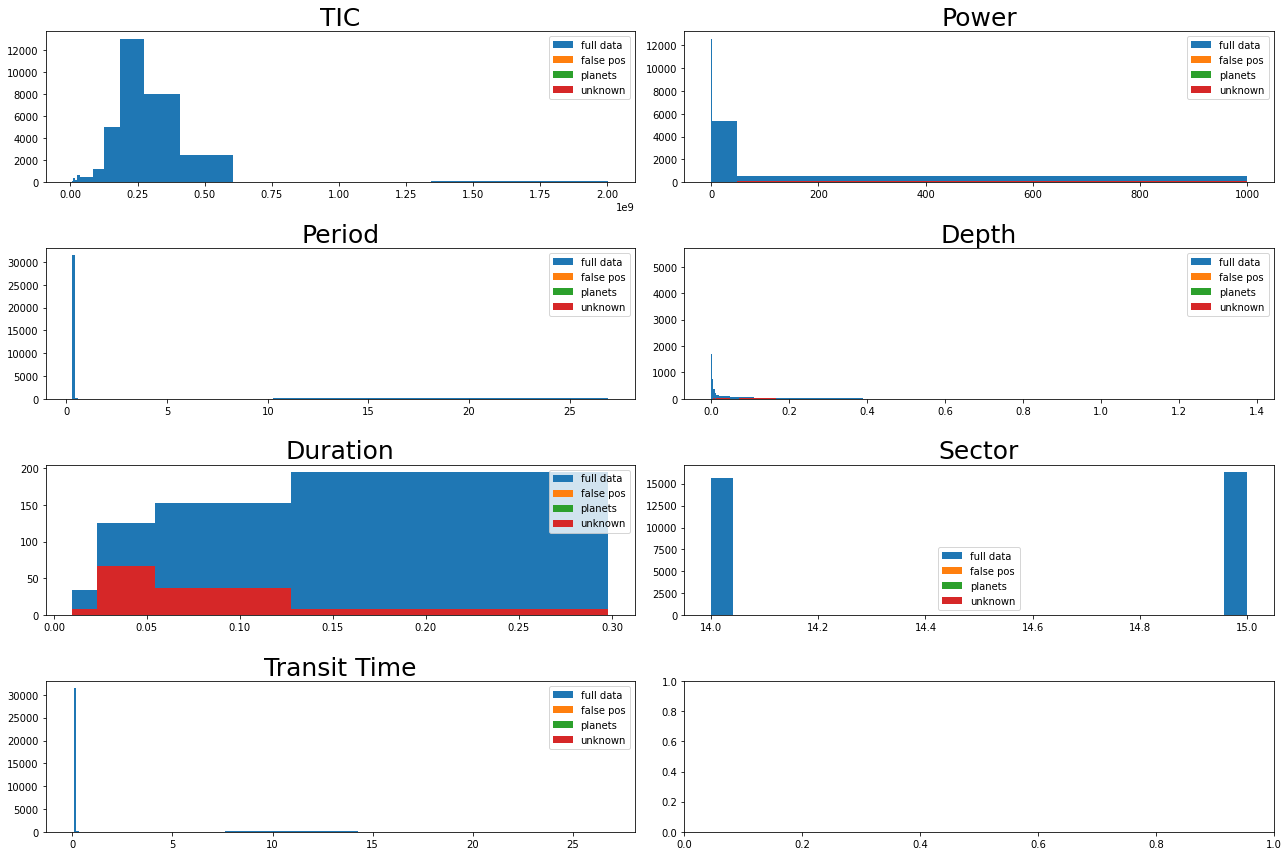

In [ ]:
fig,ax= plt.subplots(4,2,figsize=(18,12))
for i,col in enumerate(main_df.columns):
  N =[15,15,5,15,5,30,25,15]
  if min(main_df[col].to_numpy()) == 0:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())+0.005),np.log10(max(main_df[col].to_numpy())), N[i])
  else:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())),np.log10(max(main_df[col].to_numpy())), N[i])
  if i<4:
    ax[i,0].hist(main_df[col],bins,label = 'full data')
    ax[i,0].hist(falsep_list[col],bins,label='false pos')
    ax[i,0].hist(planet_list[col],bins,label = 'planets')
    ax[i,0].hist(unknown_list[col],bins, label='unknown')
    ax[i,0].set_title(col,fontsize=25)
    ax[i,0].legend()
  else:
   ax[i-4,1].hist(main_df[col],bins,label='full data')
   ax[i-4,1].hist(falsep_list[col],bins, label= 'false pos')
   ax[i-4,1].hist(planet_list[col],bins, label='planets')
   ax[i-4,1].hist(unknown_list[col],bins, label = 'unknown')
   ax[i-4,1].set_title(col,fontsize=25)
   ax[i-4,1].legend()
  plt.tight_layout()

In [ ]:
print(len(falsep_list2),len(planet_list2),len(unknown_list))

2160 1830 139


In [ ]:
import matplotlib

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

In [ ]:
%matplotlib inline

fig,ax= plt.subplots(4,2,figsize=(25,19),dpi=200)
for i,col in enumerate(main_df.columns):
  N =[15,15,5,15,5,30,25,15]
  if min(main_df[col].to_numpy()) == 0:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())+0.005),np.log10(max(main_df[col].to_numpy())), N[i])
  else:
    bins=np.logspace(np.log10(min(main_df[col].to_numpy())),np.log10(max(main_df[col].to_numpy())), N[i])
  if i<4:
    ax[i,0].hist(main_df[col],bins,label = "Full Sample post-temp cut")
    ax[i,0].hist(falsep_list2[col],bins,label="False Positive status")
    ax[i,0].hist(planet_list2[col],bins,label = "Planet Candidate status")
    ax[i,0].hist(unknown_list[col],bins, label="Unknown status")
    ax[i,0].axvline(.125,ls=':',color='black',label='Threshold value',lw=5)
    ax[i,0].set_title(col,fontsize=40)
    ax[i,0].set_title("Duration Distribution of the Best Fit Model \nin Each Star's Transit Periodogram",fontsize=25)
    ax[i,0].set_xlabel("BLS Duration Values",fontsize=25)
    ax[i,0].set_ylabel("Number of Stars",fontsize=25)
    ax[i,0].legend(fontsize=20)
  else:
   ax[i-4,1].hist(main_df[col],bins,label="Full Sample post-temp cut",zorder=0) 
   ax[i-4,1].hist(falsep_list2[col],bins, label= "False Positive status",zorder=1)
   ax[i-4,1].hist(planet_list2[col],bins, label="Planet Candidate status",zorder=2)
   ax[i-4,1].hist(unknown_list[col],bins, label = "Unknown status",zorder=3)
   ax[i-4,1].set_title(col,fontsize=40)
   ax[i-4,1].axvline(50,ls=':',color='black',label='Threshold value',lw=3)
   ax[i-4,1].set_title("Power Distribution of the Best Fit Model \nin Each Star's Transit Periodogram",fontsize=25)
   ax[i-4,1].set_xlabel("BLS Power Values",fontsize=25)
   ax[i-4,1].set_ylabel("Number of Stars",fontsize=25)
   ax[i-4,1].legend(fontsize=20)
  
  plt.tight_layout()

plt.savefig('/content/gdrive/My Drive/EscapeEarthData/Histograms')

#what we are looking at, explain axis n different colors in legend, 
#use explanations to get the main point across as to why we decided that threshold value

#we wanted everything greater than 50 etc

#explain eacxh of the groupings in the legend

#confirmed planet candidates to get to one side

Caption:

We are looking at the histograms of the distribution of power and duration of our sample. The x-axis shows the BLS power or duration values where the y-axis shows the frequency of stars. 

The values in our histograms that are colored blue represent the full sample of our data before we implented temperature and magnitude cuts. When determining the cuts we didn't know where to start so, we experimented. 

Using the [EXOFOP website](https://exofop.ipac.caltech.edu/tess/), which is collection of planet candidates determined by community efforts, we all individually researched star ids. This was important for determing the status of a star, whether it be a false positive, a potential planet candidate, or unknown.

Stars with a false positive status are colored orange. The stars with a false positive status indicate any event that could inimiate a transit, but is not in fact a transiting exoplanet. On the other hand, the frequency of the stars that are colored green on the histograms represent those that have a planent candidate status. Finally, the stars that are colored red on the graph indicate the events with an unknown status. 

In our histograms, there is a black dotted line to illustrate our threshold values. The threshold values represent where we made the data cuts in our sample. In the power histogram, our threshold value is 50 and accepts any values larger as well. The values are clearly on the right side of the threshold value in our power hiistogram. Whereas, in our the duration histogram, our threshold value is 0.125 and choose to accept any values less than that. Therefore, in our duration histogram, you can see all the values on the left side of the threshold value. We choose this based on previous research to align with our false positive status and planet candidate stars. 

In [ ]:
d = main_df['Duration'] <0.125
p = main_df['Power'] > 50
reduced_df = main_df[(p) & (d)]
reduced_df

,TIC,Period,Duration,Transit Time,Power,Depth,Sector
143,13118768,13.456649,0.106,0.05300,845,0.015350,14
169,14323558,9.557853,0.010,8.86000,769,0.088655,14
422,26584043,0.445693,0.074,0.40000,88,0.003599,14
425,26656583,0.528840,0.074,0.50100,126,0.138116,14
556,27843942,0.761510,0.074,0.72200,207,0.203324,14
...,...,...,...,...,...,...,...
31499,441804888,1.367161,0.074,1.20700,337,0.054683,15
31555,445836238,2.004430,0.106,0.20600,422,0.146150,15
31576,445859771,4.630337,0.042,0.98600,608,0.002255,15
31603,452587442,11.495120,0.010,0.00488,810,0.001692,15


In [ ]:
tics_list = reduced_df['TIC'].to_numpy()

catalog_data = Catalogs.query_criteria(catalog='TIC', ID=tics_list)
catalog_df = catalog_data.to_pandas()
catalog_df

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,...,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
0,229585356,20190415,<NA>,4437-01454-1,811-025069,18053115+7204272,NaN,J180530.98+720426.7,2260787771487150080,NaN,<NA>,STAR,tmgaia2,271.379754,72.074279,tmgaia2,-74.03780,0.042110,-54.25880,0.051423,gaia2,8.363460,0.024076,gaia2,102.710526,29.233196,85.592985,84.465312,9.997,0.041,9.31800,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007144,0.001972,0.002803,panstarrs,0.113152,0.124457,0.090933,0.102851,0.042923,0.044763,0.083246,0.080223,0.055798,0.060538,0.3430,0.3460,bj2018,138.8030,124.003,dered,9.54582,0.010118,8.62030,0.008855,1,NaN,tycho2v3,tycho2b3,NaN,0.807489,0.797526,271.378718,72.074046,0.022869,0.027462,1,0,183759521
1,42705187,20190415,93926,2640-01806-1,602-070159,19073237+3015160,NaN,J190732.44+301517.3,2042389925739687808,NaN,<NA>,STAR,tmgaia2,286.884945,30.254493,tmgaia2,110.85000,0.039916,103.11700,0.045129,gaia2,36.877100,0.025936,gaia2,61.852236,10.123834,294.212324,52.283874,8.562,0.023,7.71992,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.009759,0.000000,0.000000,NaN,0.082719,0.142196,0.042063,0.070218,0.253330,0.316711,0.110751,0.067615,0.012499,0.015799,0.0192,0.0192,bj2018,159.5340,102.919,spect,7.93661,0.006658,6.95570,0.005358,1,NaN,sirful,tycho2b3,NaN,0.641180,0.699933,286.885497,30.254937,0.018770,0.024458,1,0,245636903
2,102929927,20190415,<NA>,4378-00746-1,807-018270,08474270+7115367,NaN,J084742.85+711536.5,1121970222221461120,60047209,<NA>,STAR,tmgaia2,131.928182,71.260232,tmgaia2,46.79910,0.120689,-19.72050,0.142638,gaia2,6.270680,0.080767,gaia2,142.928728,34.801203,109.808861,50.693434,9.818,0.034,9.30200,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.002049,0.003629,0.006492,panstarrs,0.126489,0.186649,0.065711,0.104088,0.040689,0.042356,0.086308,0.080746,0.200486,0.155932,2.0260,2.0780,bj2018,108.5250,143.958,dered,9.45263,0.001406,8.71338,0.001355,1,NaN,tycho2v3,tycho2b3,NaN,2.302205,2.212013,131.928810,71.260147,0.055357,0.070500,1,0,135383808
3,136879755,20190415,<NA>,NaN,616-103590,20240244+3308333,NaN,J202402.59+330834.6,2054464556287815168,48727665,<NA>,STAR,tmgaia2,306.010226,33.142632,tmgaia2,149.55400,0.043865,73.07120,0.047595,gaia2,13.782000,0.030719,gaia2,72.522159,-2.503359,320.628997,50.446434,NaN,NaN,11.61900,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000212,0.000000,0.000000,NaN,0.072349,0.089723,0.094430,0.061871,0.282302,0.388096,0.094556,0.122566,0.008899,0.017920,0.1619,0.1626,bj2018,96.0611,144.341,dered0,12.00160,0.005311,10.37880,0.004396,1,NaN,ucac4,NaN,NaN,0.709671,0.738105,306.010995,33.142946,0.020728,0.023749,1,0,401213694
4,170344769,20190415,<NA>,NaN,654-079545,19523602+4039222,NaN,J195236.01+403921.8,2073793420945053824,NaN,5473556,STAR,tmgaia2,298.150085,40.656206,tmgaia2,-4.90866,0.026889,-7.24465,0.024935,gaia2,0.796176,0.015074,gaia2,75.453996,6.836042,315.270817,59.749239,15.123,0.067,13.66800,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bj2018,NaN,NaN,spect,13.94360,0.001316,13.04800,0.000836,1,NaN,ucac4,bpbj,NaN,0.444637,0.386739,298.150057,40.656175,0.012262,0.013819,1,0,351775367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# Conversion from milliarcseconds to arcseconds
# For loop

In [ ]:
magnitude = []

for i,m in zip(catalog_df["plx"],catalog_df["GAIAmag"]):

  #Conversion to milliarcseconds to arcseconds
  parallax = i/1000
  #Conversion from parallax to distance
  d = 1/parallax
  M = m - 5*np.log10(d) + 5

  magnitude.append(M)

print(len(magnitude))

244


In [ ]:
print(catalog_df["Teff"].min(),catalog_df["Teff"].max())

print(catalog_df)

3021.0 6498.0
            ID   version    HIP  ... raddflag wdflag      objID
0    229585356  20190415   <NA>  ...        1      0  183759521
1     42705187  20190415  93926  ...        1      0  245636903
2    102929927  20190415   <NA>  ...        1      0  135383808
3    136879755  20190415   <NA>  ...        1      0  401213694
4    170344769  20190415   <NA>  ...        1      0  351775367
..         ...       ...    ...  ...      ...    ...        ...
239  229910746  20190415   <NA>  ...        1      0  250052957
240  202505374  20190415  75260  ...        0      0  154990121
241  198242676  20190415  81519  ...        1      0  162252964
242  160228595  20190415   <NA>  ...        1      0  145004873
243  137408317  20190415   <NA>  ...        0      0  288001800

[244 rows x 125 columns]


[]

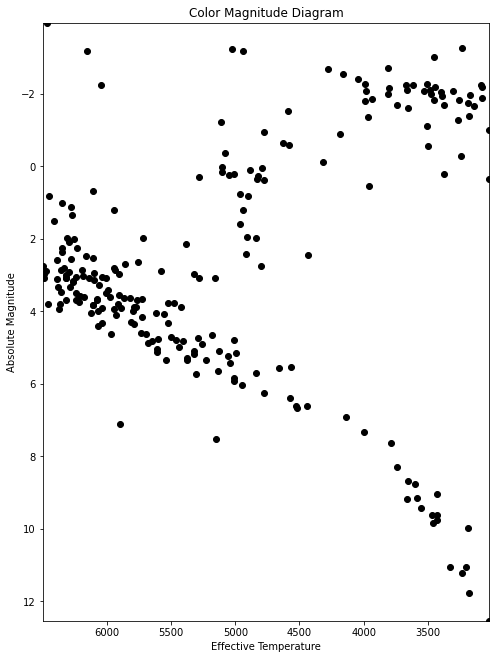

In [ ]:
Teff = catalog_df["Teff"]

%matplotlib inline
plt.figure(figsize=(8,11))
plt.scatter(Teff,magnitude, color = "black")
plt.xlim(Teff.max(), Teff.min())
plt.ylim(max(magnitude), min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')
plt.plot()

In [ ]:
slope = -0.0025714286
y_int = 15.4285715
x = np.arange(2500,6600,100)

# m = (y2 -y1) / (x2-x1)
# b = -(m*x1) + y1

In [ ]:
y_points = []

for i in x:
  y = slope * i + y_int
  y_points.append(y)

In [ ]:
x_array = np.array(x) # array for effective temperature
y_array = np.array(y_points) # array for absolute magnitude 

[]

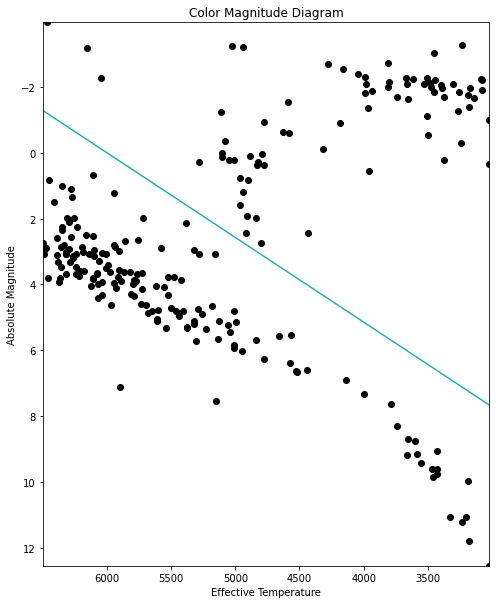

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,10))
plt.scatter(Teff,magnitude, color = "black")
plt.plot(x_array, y_array,color ="lightseagreen")
plt.xlim(Teff.max(), Teff.min())
plt.ylim(max(magnitude), min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')
plt.plot()

In [ ]:
LineMS = []

for i in Teff:
  LineM = slope * i + y_int
  LineMS.append(LineM)

print(LineMS)

[1.3499999150000015, 1.9774284934000015, -0.25971438859999907, 4.780285667400001, -0.3620572468799992, -0.19028581639999942, -0.897428681400001, -0.09514295819999852, 2.540571356800001, 0.3571713325400001, 7.511142840600001, -1.2600001140000003, 6.55714283, 5.631428534000001, 0.14142847300000128, -0.6094286782000005, 3.6920570838800018, -1.2285515422220001, 3.143417077783999, -0.8289001092100001, 2.367694212022002, 6.29999997, 0.4371427620000006, 6.5339999726, 3.5331427964, 6.6908571172, -0.6960858220199988, -0.6711429645999978, -0.7656172513639987, 7.2488571234000005, 1.7408570622, 1.1494284842000013, 6.0197142526, -0.8100001090000006, 1.8518656348620013, 6.0325713956, 2.787428502400001, 1.5790113461160011, 0.6953141934399998, 4.4382856636, 0.6068570496000003, 1.0002856254, -1.2574286854000007, 7.0585714070000005, 0.2545713314000011, -1.1494286842, 7.6602856994, 1.3885713440000007, 5.690571391800001, -0.10470867259200034, -0.39857153300000014, 2.6634599295940014, 0.24899133133800078, 

In [ ]:
catalog_df["ABS Mag"] = magnitude
print(catalog_df)

            ID   version    HIP  ... wdflag      objID   ABS Mag
0    229585356  20190415   <NA>  ...      0  183759521  3.763850
1     42705187  20190415  93926  ...      0  245636903  5.337234
2    102929927  20190415   <NA>  ...      0  135383808  3.138613
3    136879755  20190415   <NA>  ...      0  401213694  6.910361
4    170344769  20190415   <NA>  ...      0  351775367  3.084045
..         ...       ...    ...  ...    ...        ...       ...
239  229910746  20190415   <NA>  ...      0  250052957  3.495343
240  202505374  20190415  75260  ...      0  154990121 -0.113370
241  198242676  20190415  81519  ...      0  162252964  3.590442
242  160228595  20190415   <NA>  ...      0  145004873  3.604152
243  137408317  20190415   <NA>  ...      0  288001800  3.080843

[244 rows x 126 columns]


In [ ]:
Mask = []

for i,j in zip(catalog_df["ABS Mag"],LineMS):
  if i > j:
    Mask.append(True)
  else:
    Mask.append(False)


In [ ]:
nog = catalog_df[Mask]
print(nog)

            ID   version    HIP  ... wdflag      objID   ABS Mag
0    229585356  20190415   <NA>  ...      0  183759521  3.763850
1     42705187  20190415  93926  ...      0  245636903  5.337234
2    102929927  20190415   <NA>  ...      0  135383808  3.138613
3    136879755  20190415   <NA>  ...      0  401213694  6.910361
4    170344769  20190415   <NA>  ...      0  351775367  3.084045
..         ...       ...    ...  ...    ...        ...       ...
238  284295925  20190415   <NA>  ...      0  195727784  5.332761
239  229910746  20190415   <NA>  ...      0  250052957  3.495343
241  198242676  20190415  81519  ...      0  162252964  3.590442
242  160228595  20190415   <NA>  ...      0  145004873  3.604152
243  137408317  20190415   <NA>  ...      0  288001800  3.080843

[156 rows x 126 columns]


[]

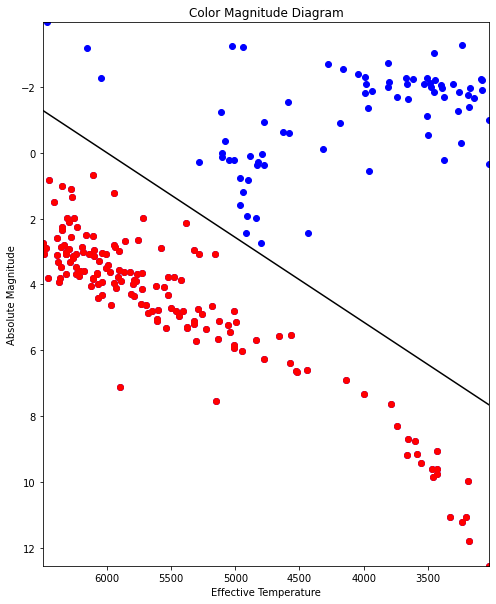

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,10))
plt.scatter(Teff,magnitude, color = "blue")
plt.scatter(nog['Teff'],nog['ABS Mag'], color = "red")
plt.plot(x_array, y_array,color ="black")
plt.xlim(Teff.max(), Teff.min())
plt.ylim(max(magnitude), min(magnitude))
plt.title('Color Magnitude Diagram')
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute Magnitude')
plt.plot()

In [ ]:
merged_data.to_csv('/content/gdrive/My Drive/EscapeEarthData/final_candidates.csv’, index=False)

SyntaxError: ignored